In [127]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

Exploring Data

In [128]:
train_data_path = r"data_source__spaceship-titanic/train.csv"

In [129]:
train_df = pd.read_csv(train_data_path)

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [131]:
train_df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


Assessing Missing Data

<Axes: >

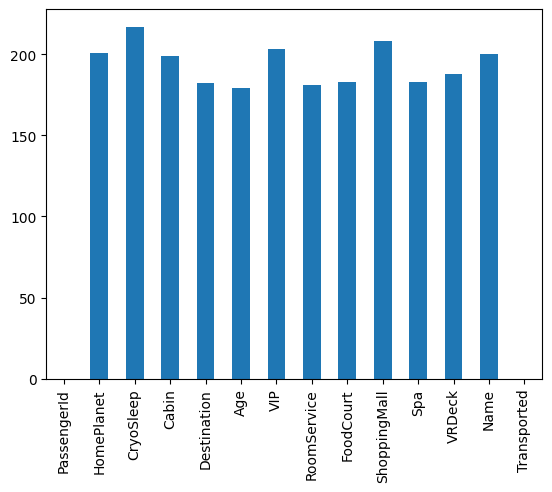

In [132]:
train_df.isna().sum().plot(kind="bar")

In [133]:
#CryoSleep seems important. I will drop rows where the data is missing. 
#However, I will first see the % of rows that will be dropped.


missing_perc = round(train_df.CryoSleep.isna().sum()/train_df.shape[0] * 100,2)

print(f"Percentage of affected rows when missing CryoSleep data is dropped: {missing_perc} %")

Percentage of affected rows when missing CryoSleep data is dropped: 2.5 %


In [134]:
# 2.5% is an acceptable percentage. I will drop the CryoSleep NA values

dropped_df = train_df.dropna(subset="CryoSleep")

<Axes: >

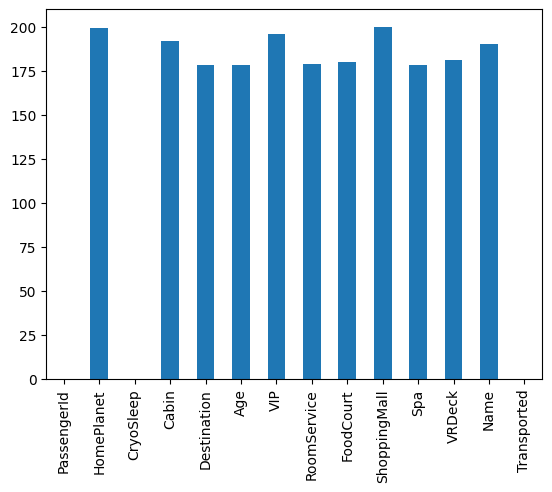

In [135]:
dropped_df.isna().sum().plot(kind="bar")

In [136]:
mode_col = ['Cabin', ]
median_col = ['Age']
zero_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
unknown_col = ['HomePlanet', 'Destination', 'Name']
false_col = ['VIP']

In [137]:
filled_df = dropped_df.copy()

In [138]:
preprocessor = ColumnTransformer(
    transformers=[
        # Replace nulls with mode
        ("mode", SimpleImputer(strategy="most_frequent"), mode_col),

        # Replace nulls with median
        ("median", SimpleImputer(strategy="median"), median_col),

        # Replace nulls with 0
        ("zero", SimpleImputer(strategy="constant", fill_value=0), zero_col),

        # Replace nulls with "unknown"
        ("unknown", SimpleImputer(strategy="constant", fill_value="unknown"), unknown_col),

        # Replace nulls with False
        ("false", SimpleImputer(strategy="constant", fill_value=False), false_col),
    ],
    remainder="passthrough"  
)



In [139]:


filled_array = preprocessor.fit_transform(filled_df)

feature_names = preprocessor.get_feature_names_out()

filled_df = pd.DataFrame(
    filled_array,
    columns=feature_names,
    index=filled_df.index
)


In [140]:
filled_df.head()

,mode__Cabin,median__Age,zero__RoomService,zero__FoodCourt,zero__ShoppingMall,zero__Spa,zero__VRDeck,unknown__HomePlanet,unknown__Destination,unknown__Name,false__VIP,remainder__PassengerId,remainder__CryoSleep,remainder__Transported
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Europa,TRAPPIST-1e,Maham Ofracculy,False,0001_01,False,False
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Earth,TRAPPIST-1e,Juanna Vines,False,0002_01,False,True
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,TRAPPIST-1e,Altark Susent,True,0003_01,False,False
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,TRAPPIST-1e,Solam Susent,False,0003_02,False,False
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Earth,TRAPPIST-1e,Willy Santantines,False,0004_01,False,True


In [141]:
filled_df.columns = filled_df.columns.str.replace(r".*__", "", regex=True)


In [142]:
filled_df

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,Destination,Name,VIP,PassengerId,CryoSleep,Transported
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Europa,TRAPPIST-1e,Maham Ofracculy,False,0001_01,False,False
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Earth,TRAPPIST-1e,Juanna Vines,False,0002_01,False,True
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,TRAPPIST-1e,Altark Susent,True,0003_01,False,False
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,TRAPPIST-1e,Solam Susent,False,0003_02,False,False
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Earth,TRAPPIST-1e,Willy Santantines,False,0004_01,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Europa,55 Cancri e,Gravior Noxnuther,True,9276_01,False,False
8689,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Earth,PSO J318.5-22,Kurta Mondalley,False,9278_01,True,False
8690,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Earth,TRAPPIST-1e,Fayey Connon,False,9279_01,False,True
8691,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Europa,55 Cancri e,Celeon Hontichre,False,9280_01,False,False


<Axes: >

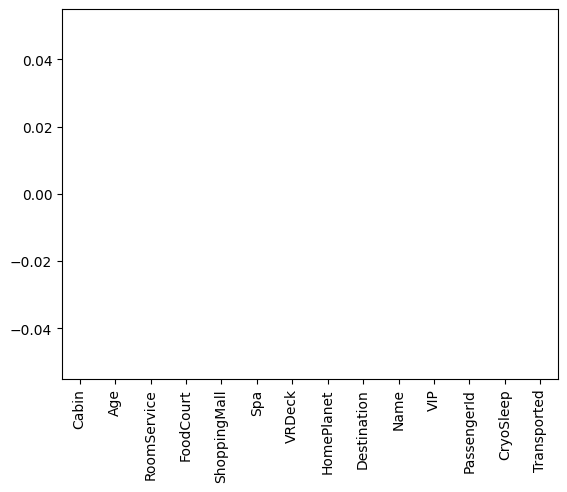

In [144]:
filled_df.isna().sum().plot(kind="bar")

In [ ]:
filled_df.head(1)

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,Destination,Name,VIP,PassengerId,CryoSleep,Transported
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Europa,TRAPPIST-1e,Maham Ofracculy,False,0001_01,False,False
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Earth,TRAPPIST-1e,Juanna Vines,False,0002_01,False,True
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,TRAPPIST-1e,Altark Susent,True,0003_01,False,False
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,TRAPPIST-1e,Solam Susent,False,0003_02,False,False
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Earth,TRAPPIST-1e,Willy Santantines,False,0004_01,False,True
5,F/0/P,44.0,0.0,483.0,0.0,291.0,0.0,Earth,PSO J318.5-22,Sandie Hinetthews,False,0005_01,False,True
6,F/2/S,26.0,42.0,1539.0,3.0,0.0,0.0,Earth,TRAPPIST-1e,Billex Jacostaffey,False,0006_01,False,True
7,G/0/S,28.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,Candra Jacostaffey,False,0006_02,True,True
8,F/3/S,35.0,0.0,785.0,17.0,216.0,0.0,Earth,TRAPPIST-1e,Andona Beston,False,0007_01,False,True
9,B/1/P,14.0,0.0,0.0,0.0,0.0,0.0,Europa,55 Cancri e,Erraiam Flatic,False,0008_01,True,True


In [151]:
filled_df['cabin_group'] = filled_df['Cabin'].str[:1]

In [157]:
filled_df['RoomService_customer'] = np.where(filled_df['RoomService']>0, True, False)
filled_df['FoodCourt_customer'] = np.where(filled_df['FoodCourt']>0, True, False)
filled_df['ShappingMall_customer'] = np.where(filled_df['ShoppingMall']>0, True, False)
filled_df['Spa_customer'] = np.where(filled_df['Spa']>0, True, False)
filled_df['VRDeck_customer'] = np.where(filled_df['VRDeck']>0, True, False)


In [158]:
filled_df.head()

,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,Destination,Name,VIP,PassengerId,CryoSleep,Transported,cabin_group,RoomService_customer,FoodCourt_customer,ShappingMall_customer,Spa_customer,VRDeck_customer
0,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Europa,TRAPPIST-1e,Maham Ofracculy,False,0001_01,False,False,B,False,False,False,False,False
1,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Earth,TRAPPIST-1e,Juanna Vines,False,0002_01,False,True,F,True,True,True,True,True
2,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,TRAPPIST-1e,Altark Susent,True,0003_01,False,False,A,True,True,False,True,True
3,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,TRAPPIST-1e,Solam Susent,False,0003_02,False,False,A,False,True,True,True,True
4,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Earth,TRAPPIST-1e,Willy Santantines,False,0004_01,False,True,F,True,True,True,True,True


In [161]:
#dropping columns

dropped_columns = ['Cabin','Name', 'PassengerId']

cleaned_df = filled_df.drop(dropped_columns, axis=1)

In [162]:
cleaned_df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,Destination,VIP,CryoSleep,Transported,cabin_group,RoomService_customer,FoodCourt_customer,ShappingMall_customer,Spa_customer,VRDeck_customer
0,39.0,0.0,0.0,0.0,0.0,0.0,Europa,TRAPPIST-1e,False,False,False,B,False,False,False,False,False
1,24.0,109.0,9.0,25.0,549.0,44.0,Earth,TRAPPIST-1e,False,False,True,F,True,True,True,True,True
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Europa,TRAPPIST-1e,True,False,False,A,True,True,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Europa,TRAPPIST-1e,False,False,False,A,False,True,True,True,True
4,16.0,303.0,70.0,151.0,565.0,2.0,Earth,TRAPPIST-1e,False,False,True,F,True,True,True,True,True


Demographics - Age

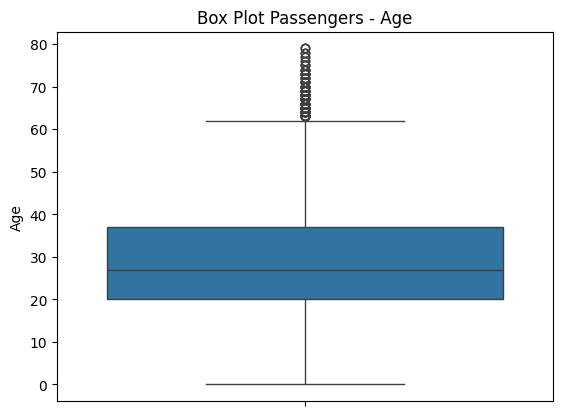

In [170]:
sns.boxplot(cleaned_df['Age'])
plt.title('Box Plot Passengers - Age')
plt.show()

In [172]:
print(f"Median Age is {cleaned_df['Age'].median()}")
print(" + " * 62)
print("")
print(f"Average Age is {cleaned_df['Age'].mean()}")
print(" + " * 62)
print("")
print(f"Max Age is {cleaned_df['Age'].max()}")
print(" + " * 62)
print("")
print(f"Min Age is {cleaned_df['Age'].min()}")
print(" + " * 62)
print("")

Median Age is 27.0
 +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  + 

Average Age is 28.81264747522416
 +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  + 

Max Age is 79.0
 +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  + 

Min Age is 0.0
 +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  +  + 



In [173]:
cleaned_df[cleaned_df['Age'] == 0]

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet,Destination,VIP,CryoSleep,Transported,cabin_group,RoomService_customer,FoodCourt_customer,ShappingMall_customer,Spa_customer,VRDeck_customer
19,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,False,True,G,False,False,False,False,False
61,0.0,0.0,0.0,0.0,0.0,0.0,Earth,PSO J318.5-22,False,True,True,G,False,False,False,False,False
86,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,True,True,G,False,False,False,False,False
102,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,False,True,G,False,False,False,False,False
157,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,False,False,G,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,True,True,G,False,False,False,False,False
8584,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,True,True,G,False,False,False,False,False
8650,0.0,0.0,0.0,0.0,0.0,0.0,Earth,TRAPPIST-1e,False,True,True,G,False,False,False,False,False
8654,0.0,0.0,0.0,0.0,0.0,0.0,Mars,TRAPPIST-1e,False,False,True,F,False,False,False,False,False


<Axes: >

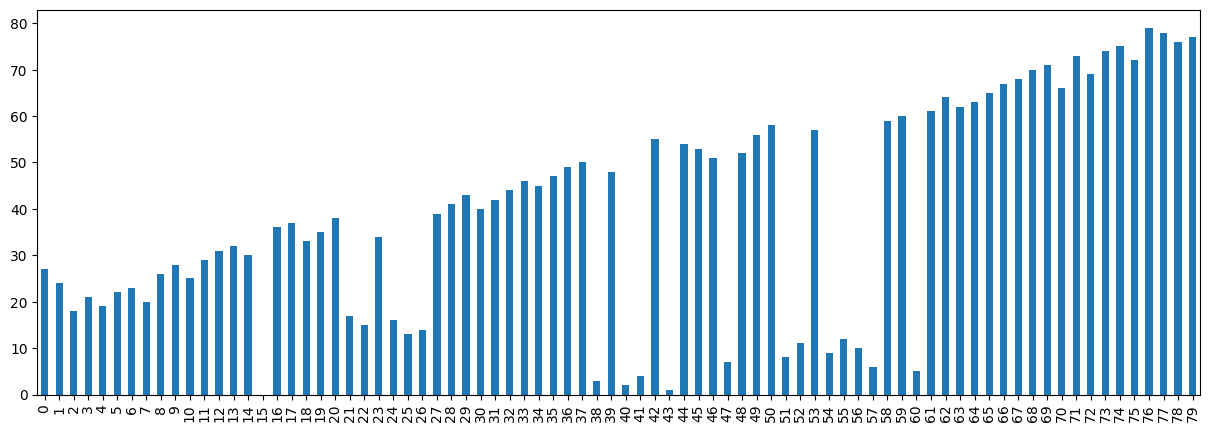

In [183]:
age_dist = cleaned_df['Age'].value_counts().reset_index()

age_dist['Age'].plot(kind='bar', figsize=(15,5))